In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report, confusion_matrix
data = pd.read_csv('C:/Users/CAMILO/arbol.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:

data.shape

(1599, 12)

In [7]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

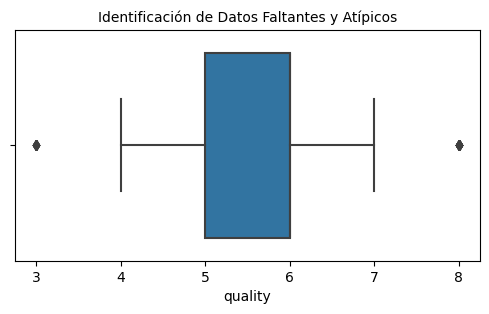

In [11]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['quality'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [12]:
print("Cantidad de Registros c: ",data['pH'].isin([0]).sum())
print("Cantidad de Registros con cero en  : ",data['sulphates'].isin([0]).sum())
print("Cantidad de Registros con cero en  : ",data['alcohol'].isin([0]).sum())
print("Cantidad de Registros con cero en  : ",data['chlorides'].isin([0]).sum())
print("Cantidad de Registros con cero en  : ",data['quality'].isin([0]).sum())

Cantidad de Registros c:  0
Cantidad de Registros con cero en  :  0
Cantidad de Registros con cero en  :  0
Cantidad de Registros con cero en  :  0
Cantidad de Registros con cero en  :  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

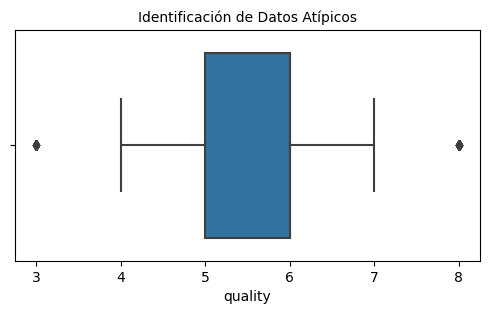

In [14]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['quality'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [15]:
nivel_minimo=4
nivel_maximo=38
Total_Atipicos=((data['quality']<nivel_minimo)|(data['quality']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 10


In [16]:
data=data[(data['quality']<nivel_maximo)&(data['quality']>nivel_minimo)]

In [17]:
Total_Atipicos=((data['quality']<nivel_minimo)|(data['quality']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1536 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1536 non-null   float64
 1   volatile acidity      1536 non-null   float64
 2   citric acid           1536 non-null   float64
 3   residual sugar        1536 non-null   float64
 4   chlorides             1536 non-null   float64
 5   free sulfur dioxide   1536 non-null   float64
 6   total sulfur dioxide  1536 non-null   float64
 7   density               1536 non-null   float64
 8   pH                    1536 non-null   float64
 9   sulphates             1536 non-null   float64
 10  alcohol               1536 non-null   float64
 11  quality               1536 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 156.0 KB


In [21]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [22]:
data[['quality']].head(40)

,quality
0,5
1,5
2,5
3,6
4,5
5,5
6,5
7,7
8,7
9,5


In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

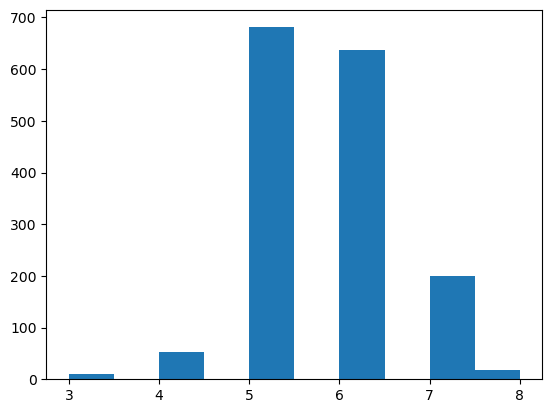

In [10]:
plt.hist(data.quality)

<Axes: xlabel='residual sugar', ylabel='sulphates'>

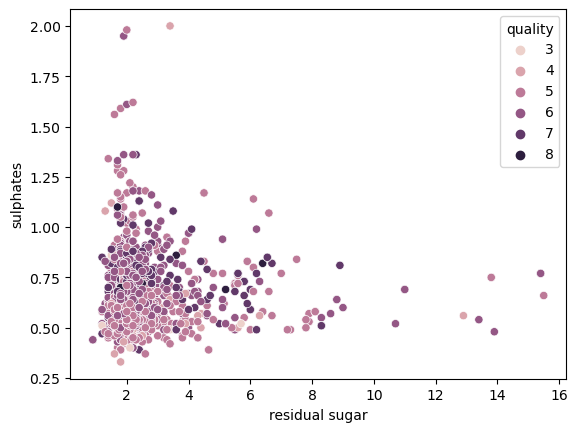

In [22]:
sns.scatterplot(x = "residual sugar", y = "sulphates", hue = "quality", data = data)

In [24]:
predictors_col = ["residual sugar", "sulphates", "pH", "sulphates"]
target_col = ['quality']

In [13]:
predictors = data[predictors_col]
target = data[target_col]

In [25]:
predictors

,fixed acidity,volatile acidity,pH,sulphates
0,7.4,0.700,3.51,0.56
1,7.8,0.880,3.20,0.68
2,7.8,0.760,3.26,0.65
3,11.2,0.280,3.16,0.58
4,7.4,0.700,3.51,0.56
...,...,...,...,...
1594,6.2,0.600,3.45,0.58
1595,5.9,0.550,3.52,0.76
1596,6.3,0.510,3.42,0.75
1597,5.9,0.645,3.57,0.71


In [26]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [27]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,pH,sulphates
fixed acidity,1.000000,-0.256131,-0.682978,0.183006
volatile acidity,-0.256131,1.000000,0.234937,-0.260987
pH,-0.682978,0.234937,1.000000,-0.196648
sulphates,0.183006,-0.260987,-0.196648,1.000000


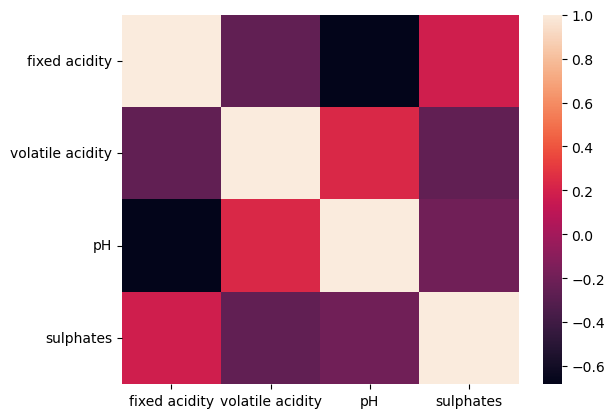

In [28]:
sns.heatmap(corr)
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [19]:
tree = DecisionTreeClassifier()

In [20]:
arbol = tree.fit(X_train, y_train)

[Text(0.39941757993344906, 0.98, 'x[3] <= 0.585\ngini = 0.644\nsamples = 1199\nvalue = [8, 42, 500, 487, 150, 12]'),
 Text(0.13725462962962964, 0.94, 'x[1] <= 0.365\ngini = 0.565\nsamples = 452\nvalue = [6, 30, 264, 134, 18, 0]'),
 Text(0.030666666666666665, 0.9, 'x[3] <= 0.505\ngini = 0.626\nsamples = 57\nvalue = [0, 3, 15, 30, 9, 0]'),
 Text(0.015407407407407408, 0.86, 'x[2] <= 3.125\ngini = 0.588\nsamples = 17\nvalue = [0, 1, 9, 6, 1, 0]'),
 Text(0.013037037037037036, 0.82, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0, 0]'),
 Text(0.017777777777777778, 0.82, 'x[1] <= 0.315\ngini = 0.531\nsamples = 14\nvalue = [0, 1, 9, 3, 1, 0]'),
 Text(0.009481481481481481, 0.78, 'x[2] <= 3.275\ngini = 0.72\nsamples = 5\nvalue = [0, 1, 1, 2, 1, 0]'),
 Text(0.004740740740740741, 0.74, 'x[0] <= 8.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 0, 1, 0]'),
 Text(0.0023703703703703703, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.0071111111111111115, 0.7, 'gini = 0.0\nsamples

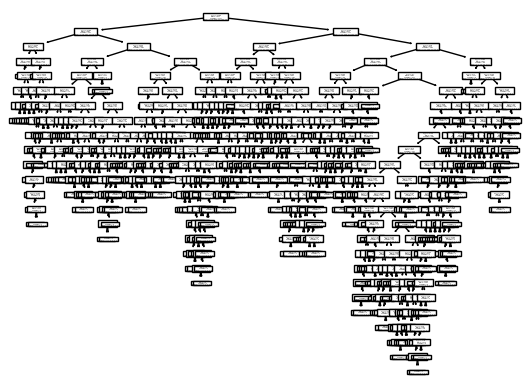

In [29]:
plot_tree(arbol)

In [30]:
predicciones = arbol.predict(X_test)

In [31]:
predicciones

array([6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 4, 6, 5, 7, 7, 7, 6, 7, 5, 6, 5, 6,
       6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6,
       5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 7, 5, 5, 7, 7, 5, 6, 5, 5, 7, 8, 7,
       6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 7, 7, 6, 5, 5, 6, 6, 5,
       7, 6, 5, 6, 6, 6, 7, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 7, 6, 5, 5, 7,
       4, 6, 6, 6, 6, 6, 7, 7, 4, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6,
       4, 7, 7, 5, 7, 5, 6, 6, 5, 5, 5, 7, 7, 5, 5, 5, 6, 5, 6, 6, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 7, 7, 5, 4, 5, 5, 5, 5, 5, 8, 4,
       5, 5, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 7, 6,
       5, 5, 6, 6, 4, 6, 5, 4, 6, 6, 7, 6, 6, 5, 4, 6, 7, 5, 6, 6, 5, 5,
       5, 5, 6, 6, 7, 6, 5, 5, 4, 6, 6, 6, 5, 5, 6, 6, 6, 4, 5, 5, 5, 6,
       6, 7, 5, 6, 7, 6, 5, 6, 6, 5, 5, 5, 6, 6, 3, 7, 5, 5, 6, 6, 5, 5,
       6, 5, 6, 7, 5, 6, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 4, 6, 6, 5, 6, 4,
       6, 7, 5, 5, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5,

In [32]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,2,0,0,0
4,0,3,6,1,1,0
5,1,8,121,44,7,0
6,0,6,44,85,14,2
7,0,0,4,18,23,4
8,0,0,0,1,5,0


In [33]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.58